# Objetivos do projeto

Os objetivos principais deste projeto são 2:

- Aplicar conhecimentos de análise de dados previamente obtidos
- Analisar o desempenho de uma árvore de decisão no conjunto de dados estudado
  - Calcular e avaliar métricas do modelo estudado

#Importação de bibliotecas e download do dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

%matplotlib inline

In [2]:
!pip install -q opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gustavosampaiolima
Your Kaggle Key: ··········


100%|██████████| 207k/207k [00:00<00:00, 47.0MB/s]

In [3]:
df = pd.read_csv('/content/high-school-alcoholism-and-academic-performance/EN_Dataset/en_lpor_explorer.csv')

# Análise geral dos dados

## Formato inicial de atributos e suas propriedades

Primeiramente, podemos obter uma noção de como é a anotação para cada atributo observando as primeiras instâncias.

In [4]:
df.head()

School  Gender  Age Housing_Type Family_Size  Parental_Status  \
0  Gabriel Pereira  Female   18        Urban     Above 3        Separated   
1  Gabriel Pereira  Female   17        Urban     Above 3  Living Together   
2  Gabriel Pereira  Female   15        Urban     Up to 3  Living Together   
3  Gabriel Pereira  Female   15        Urban     Above 3  Living Together   
4  Gabriel Pereira  Female   16        Urban     Above 3  Living Together   

   Mother_Education        Father_Education Mother_Work Father_Work  ...  \
0  Higher Education        Higher Education   Homemaker     Teacher  ...   
1    Primary School          Primary School   Homemaker       other  ...   
2    Primary School          Primary School   Homemaker       other  ...   
3  Higher Education  Lower Secondary School      Health    Services  ...   
4       High School             High School       other       other  ...   

  Is_Dating Good_Family_Relationship Free_Time_After_School Time_with_Friends  \
0        No                     Good               Moderate              High   
1        No                Excellent               Moderate          Moderate   
2        No                     Good               Moderate               Low   
3       Yes                     Fair                    Low               Low   
4        No                     Good               Moderate               Low   

  Alcohol_Weekdays Alcohol_Weekends Health_Status School_Absence  \
0         Very Low         Very Low          Fair              4   
1         Very Low         Very Low          Fair              2   
2              Low         Moderate          Fair              6   
3         Very Low         Very Low     Very Good              0   
4         Very Low              Low     Very Good              0   

  Grade_1st_Semester Grade_2nd_Semester  
0                  0                 11  
1                  9                 11  
2                 12                 13  
3                 14                 14  
4                 11                 13  

[5 rows x 31 columns]

Além disso, observar o formato do conjunto de dados também é importante.

In [5]:
df.shape

(649, 31)

Podemos ver que existem 649 instâncias e 31 variáveis ​​no conjunto como um todo.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   School                        649 non-null    object
 1   Gender                        649 non-null    object
 2   Age                           649 non-null    int64 
 3   Housing_Type                  649 non-null    object
 4   Family_Size                   649 non-null    object
 5   Parental_Status               649 non-null    object
 6   Mother_Education              649 non-null    object
 7   Father_Education              649 non-null    object
 8   Mother_Work                   649 non-null    object
 9   Father_Work                   649 non-null    object
 10  Reason_School_Choice          649 non-null    object
 11  Legal_Responsibility          649 non-null    object
 12  Commute_Time                  649 non-null    object
 13  Weekly_Study_Time   

In [7]:
df.isnull().sum()

School                          0
Gender                          0
Age                             0
Housing_Type                    0
Family_Size                     0
Parental_Status                 0
Mother_Education                0
Father_Education                0
Mother_Work                     0
Father_Work                     0
Reason_School_Choice            0
Legal_Responsibility            0
Commute_Time                    0
Weekly_Study_Time               0
Extra_Educational_Support       0
Parental_Educational_Support    0
Private_Tutoring                0
Extracurricular_Activities      0
Attended_Daycare                0
Desire_Graduate_Education       0
Has_Internet                    0
Is_Dating                       0
Good_Family_Relationship        0
Free_Time_After_School          0
Time_with_Friends               0
Alcohol_Weekdays                0
Alcohol_Weekends                0
Health_Status                   0
School_Absence                  0
Grade_1st_Seme

Não há valores nulos, portanto a limpeza de tais dados é dispensável.

Vale ressaltar que o dicionário (colunas) do dataset pode ser encontrado [aqui](https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance).

## Distribuição das variáveis

Agora, podemos ver como é a distribuição em cada feature numérica disponível. Para isso, será utilizado um histograma.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'School_Absence'}>],
       [<Axes: title={'center': 'Grade_1st_Semester'}>,
        <Axes: title={'center': 'Grade_2nd_Semester'}>]], dtype=object)

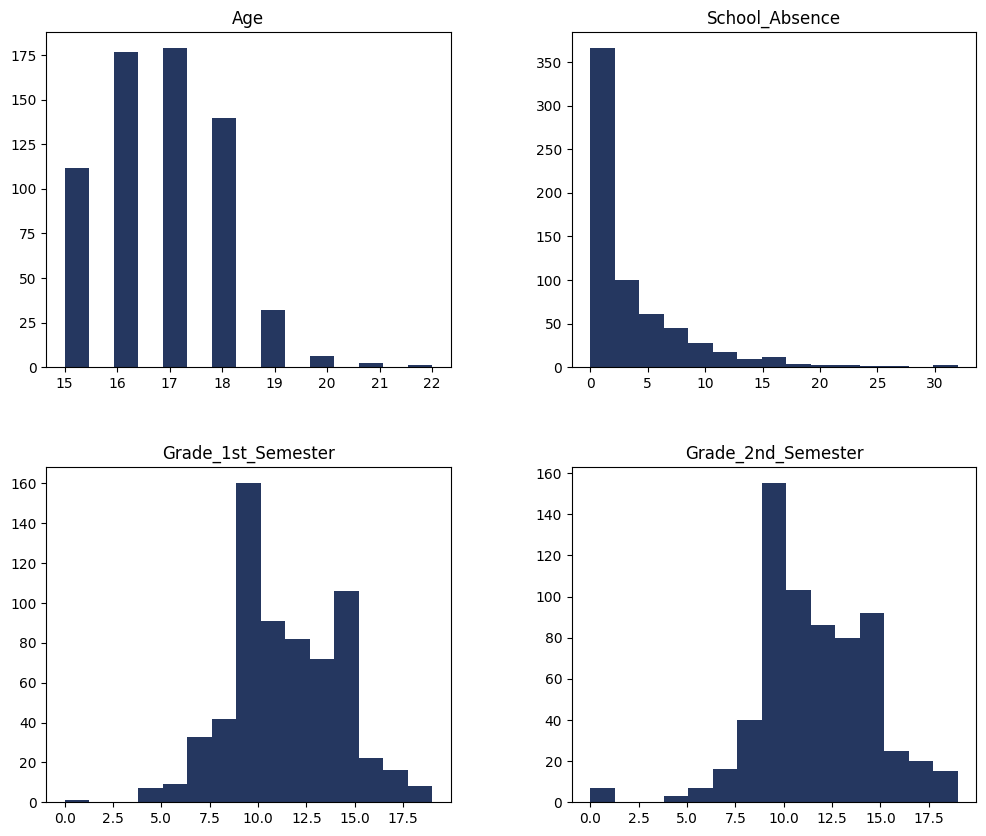

In [8]:
df.hist(bins=15, figsize=(12, 10), grid=False, color="#253760")

Além disso, também podemos observar como as variáveis categóricas estão dispostas.

ValueError: num must be an integer with 1 <= num <= 26, not 27

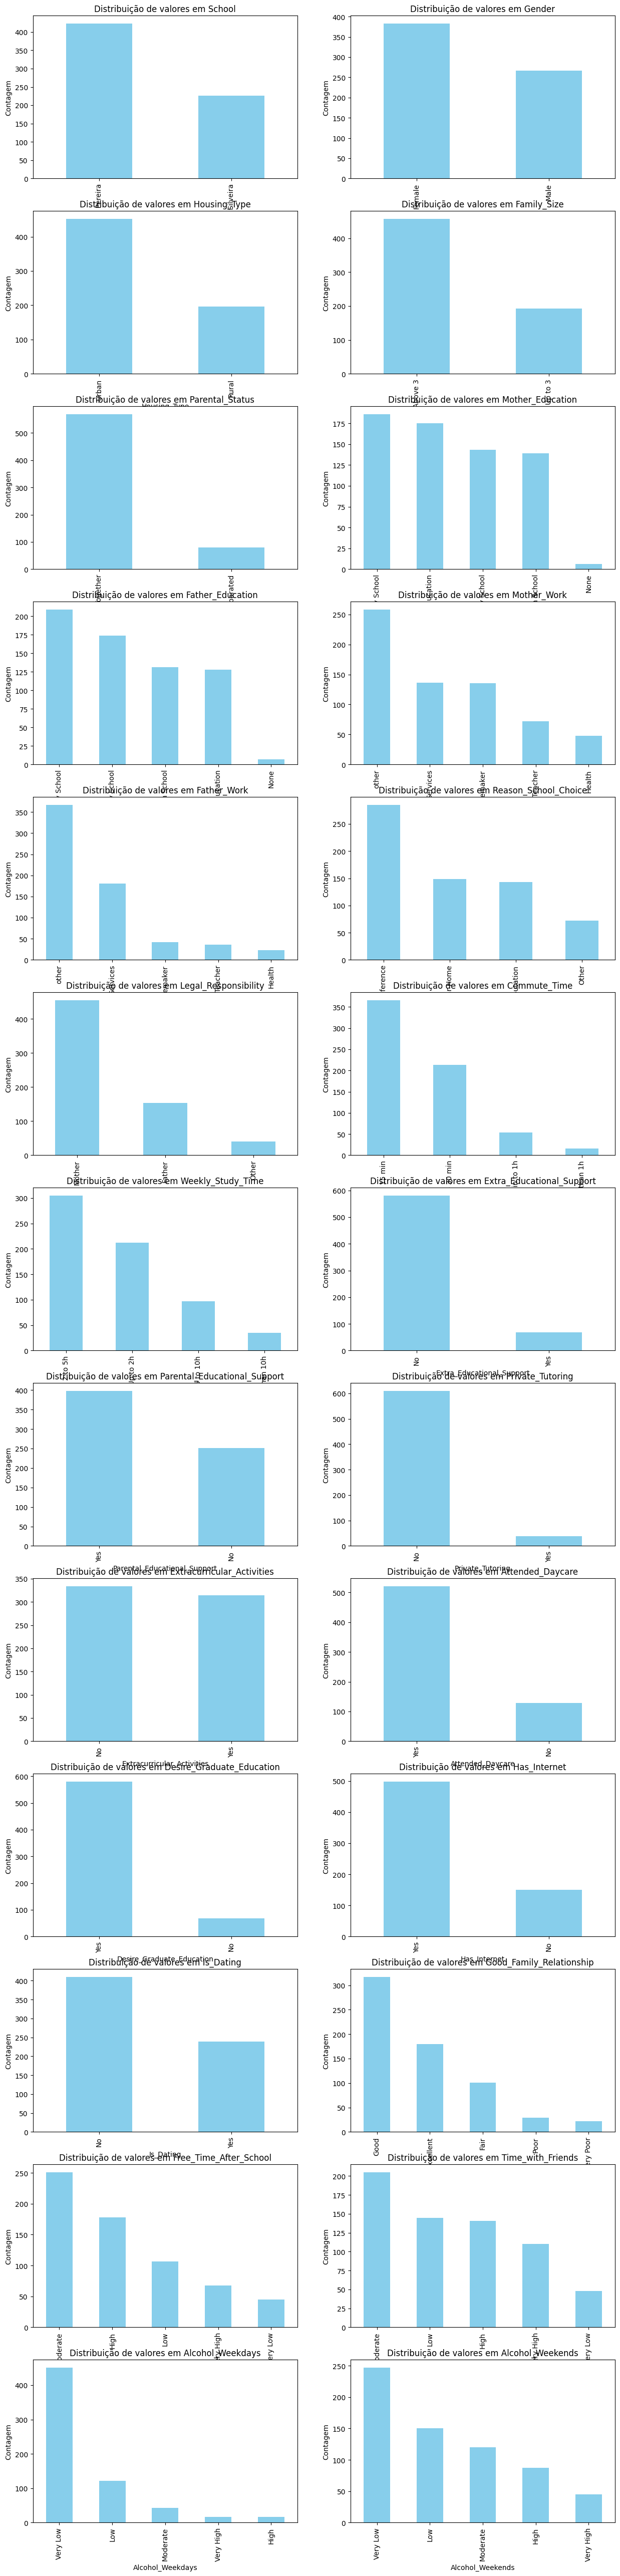

In [13]:
colunas_categoricas = [col for col in df.columns if df[col].dtype == 'object']

num_linhas = (len(colunas_categoricas) // 2)
num_colunas = 2
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 5*num_linhas))

for i, col in enumerate(colunas_categoricas):
    linha = i // num_colunas
    coluna = i % num_colunas
    plt.subplot(num_linhas, num_colunas, i + 1)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição de valores em {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

## Verificação de outliers


Valores atípicos têm o potencial de impactar a análise de dados, uma vez que, ao se destacarem consideravelmente do restante dos dados em um conjunto de dados, podem distorcer a análise, levando a interpretações que não refletem precisamente a realidade da maneira mais adequada.

Sendo assim, pela distribuição dos histogramas vista anteriormente, é possível verificar indícios da presença de valores atípicos, como nas variáveis `Age` e `School_Absence`.

Desse modo, serão realizadas duas verificações rápidas para detectação de outliers:

- Resumo estatístico
- Análise por meio do boxplot.

### Resumo estatístico

In [14]:
df.describe()

Age  School_Absence  Grade_1st_Semester  Grade_2nd_Semester
count  649.000000      649.000000          649.000000          649.000000
mean    16.744222        3.659476           11.399076           11.570108
std      1.218138        4.640759            2.745265            2.913639
min     15.000000        0.000000            0.000000            0.000000
25%     16.000000        0.000000           10.000000           10.000000
50%     17.000000        2.000000           11.000000           11.000000
75%     18.000000        6.000000           13.000000           13.000000
max     22.000000       32.000000           19.000000           19.000000

Pelo resumo estatístico, pode-se notar por exemplo que:

- Na variável `School_Absence`, 75% dos valores abaixo de 6 faltas. Contudo, seu valor máximo é de 32 faltas.
- A variável `Age`, mostra que a média de idade dos estudantes analisados é poor volta de 16, no entanto há a presença de um estudante com 22 anos.

### Boxplots para variáveis númericas

In [15]:
def plotar_boxplots(df):
    # Selecionar colunas do tipo int64
    colunas_int64 = df.select_dtypes(include=['int64']).columns

    # Configurar o número de subplots por linha
    if len(colunas_int64) % 2 == 0:
      num_subplots_por_linha = 2
    else:
      num_subplots_por_linha = 3

    num_linhas = len(colunas_int64) // num_subplots_por_linha + (1 if len(colunas_int64) % num_subplots_por_linha != 0 else 0)

    # Configurar o tamanho total da figura
    fig, axs = plt.subplots(num_linhas, num_subplots_por_linha, figsize=(10, 5 * num_linhas))
    fig.suptitle('Boxplots para Variáveis Limpadas', y=1.02)

    # Iterar sobre as colunas e criar os boxplots
    for i, feature in enumerate(colunas_int64):
        linha = i // num_subplots_por_linha
        coluna = i % num_subplots_por_linha

        axs[linha, coluna].boxplot(df[feature], vert=False)
        axs[linha, coluna].set_title(feature)

    # Ajustar o layout
    plt.tight_layout()

    # Exibir a figura
    plt.show()

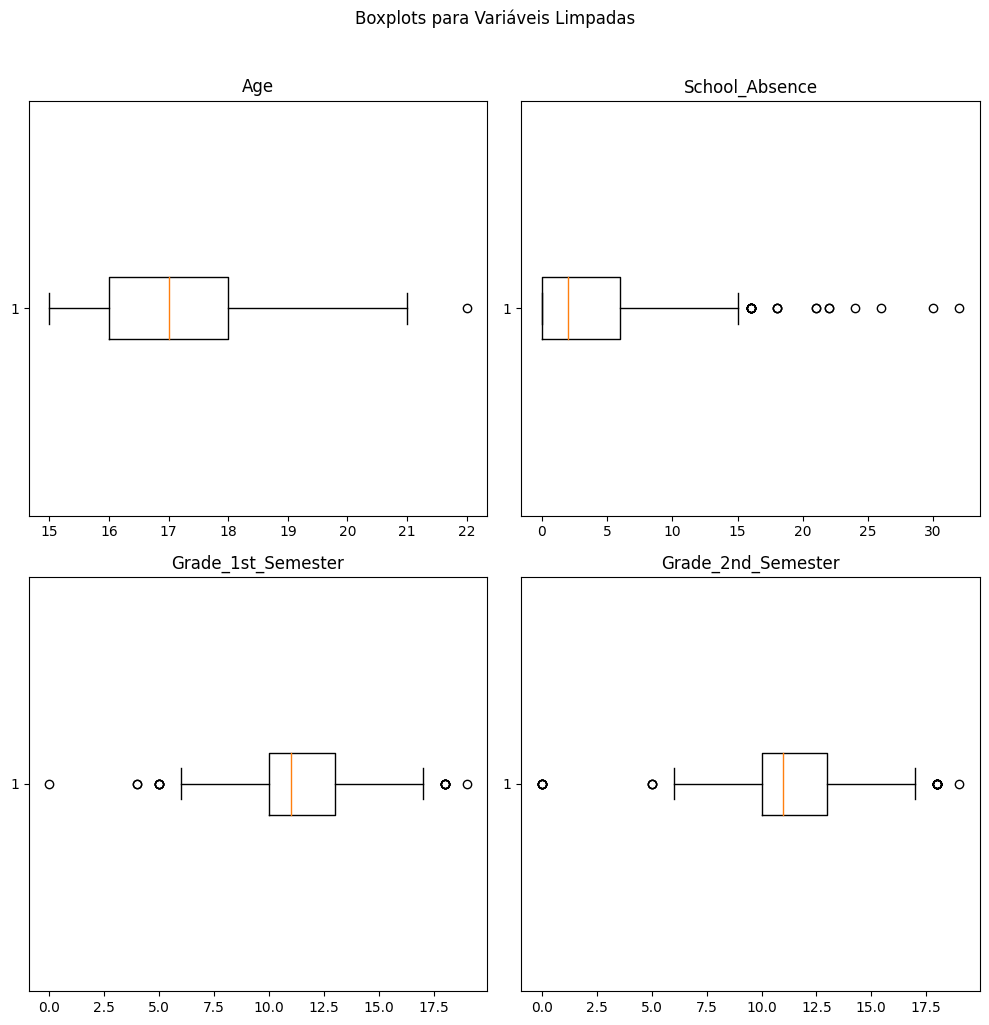

In [16]:
plotar_boxplots(df)

## Limpeza de Outliers

Para fazer a "limpeza" de outliers usarei a regra 1.5 x FIQ, acima do terceiro quartil ou abaixo do primeiro quartil com $FIQ$ sendo a faixa interquantil ( quantidade da dispersão no meio
$50\%$, de um conjunto de dados $Q_3 - Q_1$).

Em outras palavras, aqui defino outliers baixos como valores abaixo de $Q_1 - 1,5 * FIQ$ e outliers altos como valores acima de $Q_3 + 1,5 * FIQ$.

### Cálculo das FIQ's

Para facilitar os cálculos e o armazenamento dos mesmos criarei uma classe que guardará e centralzará tudo isso.

In [17]:
class CalculosEstatisticos():
  def __init__(self, df):
        self.df = df
        self.resultados = {}

  def calcular_estatisticas(self, variavel):
      q1 = self.df[variavel].quantile(.25)
      q3 = self.df[variavel].quantile(.75)
      fiq = q3 - q1
      sup = q3 + (1.5 * fiq)
      inf = q1 - (1.5 * fiq)

      self.resultados[variavel] = {
          'q1': q1,
          'q3': q3,
          'fiq': fiq,
          'limite_superior': sup,
          'limite_inferior': inf
      }

  def imprimir_resultados(self, variavel):
      if variavel in self.resultados:
          resultado = self.resultados[variavel]
          print(f'Variável: {variavel}')
          print(f'Valor 1º Quartil: {resultado["q1"]:.2f}')
          print(f'Valor 3º Quartil: {resultado["q3"]:.2f}')
          print(f'Valor do FIQ: {resultado["fiq"]:.2f}')
          print(f'Valor Limite Superior: {resultado["limite_superior"]:.2f}')
          print(f'Valor Limite Inferior: {resultado["limite_inferior"]:.2f}' + '\n')
      else:
          print(f'Variável {variavel} não encontrada nos cálculos.' + '\n')

  def aplicar_mudancas(self, variavel):
    if variavel in self.resultados:
      limite_superior = self.resultados[variavel]['limite_superior']
      limite_inferior = self.resultados[variavel]['limite_inferior']

      # Filtrar e remover linhas com valores fora dos limites
      self.df.drop(self.df[self.df[variavel] > limite_superior].index, axis=0, inplace=True)
      self.df.drop(self.df[self.df[variavel] < limite_inferior].index, axis=0, inplace=True)
    else:
      print(f"Variável {variavel} não encontrada nos resultados.")


In [18]:
calculadora = CalculosEstatisticos(df)

for feature in df.select_dtypes(include=['int64']).columns:
  calculadora.calcular_estatisticas(feature)
  calculadora.imprimir_resultados(feature)
  calculadora.aplicar_mudancas(feature)

Variável: Age
Valor 1º Quartil: 16.00
Valor 3º Quartil: 18.00
Valor do FIQ: 2.00
Valor Limite Superior: 21.00
Valor Limite Inferior: 13.00

Variável: School_Absence
Valor 1º Quartil: 0.00
Valor 3º Quartil: 6.00
Valor do FIQ: 6.00
Valor Limite Superior: 15.00
Valor Limite Inferior: -9.00

Variável: Grade_1st_Semester
Valor 1º Quartil: 10.00
Valor 3º Quartil: 13.00
Valor do FIQ: 3.00
Valor Limite Superior: 17.50
Valor Limite Inferior: 5.50

Variável: Grade_2nd_Semester
Valor 1º Quartil: 10.00
Valor 3º Quartil: 13.00
Valor do FIQ: 3.00
Valor Limite Superior: 17.50
Valor Limite Inferior: 5.50



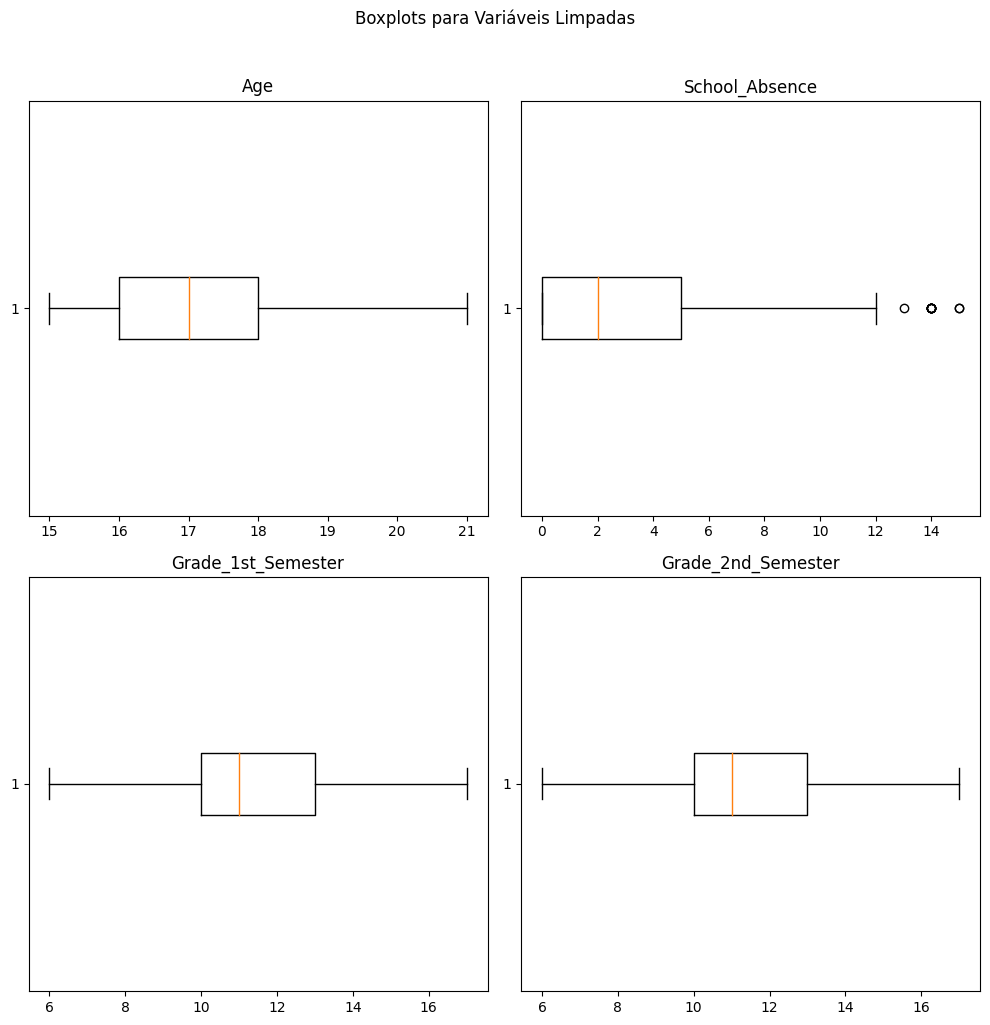

In [19]:
plotar_boxplots(df)

# Feature Engineering dos dados

Feature Engineering (Engenharia de recursos) é o processo de transformar dados brutos em recursos úteis que nos ajudam a entender melhor nosso modelo e aumentar seu poder preditivo.

## Criação de variável alvo

A análise da distribuição de valores entre os diversos atributos revela que, até o momento, não identificamos nenhuma associação direta com a classificação final do aluno. Em outras palavras, não encontramos indicadores que indiquem se um aluno foi classificado como excelente ou insatisfatório em uma disciplina específica.

Uma abordagem intrigante para abordar essa lacuna seria explorar essa classificação ao longo de diferentes semestres, já que possuímos dados de desempenho em dois semestres distintos.

Dado que não temos uma estrutura similar para os demais atributos, proponho a criação de um novo atributo denominado **"Assessment"**, representando a média aritmética simples das notas obtidas nos dois semestres. Este novo atributo será categorizado da seguinte forma:

- I: Média inferior a 10 (Insatisfatorio)
- B: Média entre 10 e 15 (Bom)
- MB: Média superior a 15 (Muito Bom)

Espera-se que essa abordagem forneça uma perspectiva mais clara sobre o desempenho geral dos alunos, permitindo a análise de padrões de avaliação ao longo do tempo.

In [20]:
df['Final_Note'] = (df['Grade_1st_Semester'] + df['Grade_2nd_Semester']) / 2

conditions = [
    df['Final_Note'] < 10,
    (df['Final_Note'] >= 10) & (df['Final_Note'] <= 15),
    df['Final_Note'] > 15
]
categories = ['I', 'B', 'MB']

# Cria a nova coluna 'Final_Category'
df['Assessment'] = np.select(conditions, categories)
df.drop('Final_Note', axis=1)
df.head()

School  Gender  Age Housing_Type Family_Size  Parental_Status  \
1  Gabriel Pereira  Female   17        Urban     Above 3  Living Together   
2  Gabriel Pereira  Female   15        Urban     Up to 3  Living Together   
3  Gabriel Pereira  Female   15        Urban     Above 3  Living Together   
4  Gabriel Pereira  Female   16        Urban     Above 3  Living Together   
5  Gabriel Pereira    Male   16        Urban     Up to 3  Living Together   

   Mother_Education        Father_Education Mother_Work Father_Work  ...  \
1    Primary School          Primary School   Homemaker       other  ...   
2    Primary School          Primary School   Homemaker       other  ...   
3  Higher Education  Lower Secondary School      Health    Services  ...   
4       High School             High School       other       other  ...   
5  Higher Education             High School    Services       other  ...   

  Free_Time_After_School Time_with_Friends Alcohol_Weekdays Alcohol_Weekends  \
1               Moderate          Moderate         Very Low         Very Low   
2               Moderate               Low              Low         Moderate   
3                    Low               Low         Very Low         Very Low   
4               Moderate               Low         Very Low              Low   
5                   High               Low         Very Low              Low   

  Health_Status School_Absence Grade_1st_Semester Grade_2nd_Semester  \
1          Fair              2                  9                 11   
2          Fair              6                 12                 13   
3     Very Good              0                 14                 14   
4     Very Good              0                 11                 13   
5     Very Good              6                 12                 12   

  Final_Note Assessment  
1       10.0          B  
2       12.5          B  
3       14.0          B  
4       12.0          B  
5       12.0          B  

[5 rows x 33 columns]

## Criação dos conjuntos de treino do modelo

Queremos analisar aqui, se uma arvore de decisao pode nos ajudar a definir se, informações da vida pessoal do objeto analisado, somado ao fato de consumir (ou nao) álcool influencia diretamente em seu desempenho escolar.

Pela motivação apresentada, podemos definir dois conjuntos de dados de treino diferentes, um deles contendo somente os dados que nada tem a ver com o consumo do álcool.

In [21]:
X_without_alcohol = df.drop(columns = ['Grade_1st_Semester', 'Grade_2nd_Semester','Final_Note', 'Alcohol_Weekdays', 'Alcohol_Weekends', 'Assessment'], axis = 1)
X_with_alcohol = df.drop(columns = ['Grade_1st_Semester', 'Grade_2nd_Semester', 'Final_Note', 'Assessment'], axis=1)
y = df['Assessment']

In [22]:
#Conjuntos sem alcool
X1_train, X1_test, y1_train, y1_test = train_test_split(X_without_alcohol, y, test_size = 0.3, random_state = 42)
X1_train.shape, X1_test.shape

((417, 27), (179, 27))

In [23]:
#Conjuntos com alcool
X2_train, X2_test, y2_train, y2_test = train_test_split(X_with_alcohol, y, test_size = 0.3, random_state = 42)
X2_train.shape, X2_test.shape

((417, 29), (179, 29))

## Encoding e Normalização

### Normalização de dados numerais

 A normalização é um processo pelo qual os valores numéricos são ajustados para uma escala comum Essa prática é especialmente relevante em algoritmos que são sensíveis à escala dos dados.

In [24]:
norm_cols1 = X1_train.select_dtypes(include=['int64']).columns

normalizer1 = StandardScaler()

X1_train[norm_cols1] = normalizer1.fit_transform(X1_train[norm_cols1])

X1_test[norm_cols1] = normalizer1.transform(X1_test[norm_cols1])

In [25]:
norm_cols2 = X2_train.select_dtypes(include=['int64']).columns

normalizer2 = StandardScaler()

X2_train[norm_cols2] = normalizer2.fit_transform(X2_train[norm_cols2])

X2_test[norm_cols2] = normalizer2.transform(X2_test[norm_cols2])

### Enconding de dados categóricos

In [26]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


Observe como estão distribuídos os valores não numerais neste exemplo

In [27]:
X1_train.head()

School  Gender       Age Housing_Type Family_Size  \
648  Mousinho da Silveira    Male  1.037025        Rural     Up to 3   
613  Mousinho da Silveira  Female  1.037025        Urban     Above 3   
467  Mousinho da Silveira  Female -0.594822        Rural     Above 3   
243       Gabriel Pereira  Female  0.221102        Urban     Above 3   
456  Mousinho da Silveira  Female -0.594822        Urban     Above 3   

     Parental_Status        Mother_Education        Father_Education  \
648  Living Together             High School  Lower Secondary School   
613  Living Together             High School             High School   
467  Living Together  Lower Secondary School  Lower Secondary School   
243        Separated  Lower Secondary School          Primary School   
456  Living Together          Primary School          Primary School   

    Mother_Work Father_Work  ... Extracurricular_Activities Attended_Daycare  \
648    Services       other  ...                         No               No   
613    Services    Services  ...                         No              Yes   
467       other    Services  ...                        Yes              Yes   
243       other       other  ...                        Yes              Yes   
456   Homemaker       other  ...                         No               No   

    Desire_Graduate_Education Has_Internet Is_Dating Good_Family_Relationship  \
648                       Yes          Yes        No                     Good   
613                       Yes           No       Yes                Excellent   
467                       Yes          Yes        No                Excellent   
243                       Yes          Yes       Yes                     Fair   
456                       Yes           No       Yes                Excellent   

    Free_Time_After_School Time_with_Friends Health_Status School_Absence  
648                   High          Very Low     Very Good       0.227618  
613               Moderate              High     Very Good      -0.898991  
467               Moderate              High          Poor      -0.617339  
243                    Low          Moderate          Fair      -0.898991  
456                   High          Moderate          Poor      -0.898991  

[5 rows x 27 columns]

Muitos modelos de machine learning, especialmente aqueles baseados em árvores de decisão, trabalham melhor com dados numéricos do que com dados categóricos. Os modelos muitas vezes operam com equações matemáticas e operações matriciais, e lidar com valores numéricos é mais direto para eles.

Quando se tem variáveis categóricas nos dados, é comum realizar um processo chamado de "codificação" (enconding) para convertê-los em uma forma numérica que os modelos possam entender. As técnicas de codificação mais comuns incluem o One-Hot Encoding e a Codificação Ordinal.

No nosso exemplo estarei tilizando a Codificação Ordinal.

In [28]:
encoder_cols1 = X1_train.select_dtypes(include=['object']).columns

encoder1 = ce.OrdinalEncoder(cols=encoder_cols1)

X1_train = encoder1.fit_transform(X1_train)

X1_test = encoder1.transform(X1_test)

Agora aqueles valores são tidos como números, onde cada número indica a que tipo de objeto aquela instância pertencia.


In [29]:
encoder_cols2 = X2_train.select_dtypes(include=['object']).columns

encoder2 = ce.OrdinalEncoder(cols=encoder_cols2)

X2_train = encoder2.fit_transform(X2_train)

X2_test = encoder2.transform(X2_test)

# Árvores de decisão

## Árvores de decisão utilizando o critério gini

O critério de Gini é uma medida utilizada em árvores de decisão para avaliar a impureza dos dados em um nó. Nas árvores de decisão, durante a construção do modelo, o algoritmo decide como dividir os dados em cada nó com base em critérios que buscam minimizar a impureza.

O critério de Gini mede a probabilidade de classificação errada de um elemento escolhido aleatoriamente se ele for erroneamente rotulado de acordo com a distribuição das classes no nó. Em outras palavras, quanto menor o índice de Gini, menor a impureza do nó.

In [30]:
clf1_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

clf1_gini.fit(X1_train, y1_train)

clf2_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

clf2_gini.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
y1_pred_gini = clf1_gini.predict(X1_test)
y2_pred_gini = clf2_gini.predict(X2_test)

In [32]:
print('Training set score: {:.4f}'.format(clf1_gini.score(X1_train, y1_train)))
print('Test set score: {:.4f}'.format(clf1_gini.score(X1_test, y1_test)))

Training set score: 0.7458
Test set score: 0.7598


In [33]:
print('Training set score: {:.4f}'.format(clf2_gini.score(X2_train, y2_train)))

print('Test set score: {:.4f}'.format(clf2_gini.score(X2_test, y2_test)))

Training set score: 0.7530
Test set score: 0.7598


In [34]:
plt.figure(figsize=(120,120))

tree.plot_tree(clf1_gini, feature_names=X1_train.columns, filled=True, rounded=True)

[Text(0.6041666666666666, 0.9, 'Desire_Graduate_Education <= 1.5\ngini = 0.488\nsamples = 417\nvalue = [274, 115, 28]'),
 Text(0.3333333333333333, 0.7, 'School <= 1.5\ngini = 0.456\nsamples = 371\nvalue = [259, 84, 28]'),
 Text(0.16666666666666666, 0.5, 'Good_Family_Relationship <= 2.5\ngini = 0.549\nsamples = 128\nvalue = [70, 49, 9]'),
 Text(0.08333333333333333, 0.3, 'Legal_Responsibility <= 1.5\ngini = 0.526\nsamples = 99\nvalue = [61, 29, 9]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.594\nsamples = 64\nvalue = [32, 24, 8]'),
 Text(0.125, 0.1, 'gini = 0.292\nsamples = 35\nvalue = [29, 5, 1]'),
 Text(0.25, 0.3, 'Reason_School_Choice <= 1.5\ngini = 0.428\nsamples = 29\nvalue = [9, 20, 0]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.278\nsamples = 18\nvalue = [3, 15, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.496\nsamples = 11\nvalue = [6, 5, 0]'),
 Text(0.5, 0.5, 'Weekly_Study_Time <= 1.5\ngini = 0.368\nsamples = 243\nvalue = [189, 35, 19]'),
 Text(0.4166666666666667, 0.3, 'Age

In [35]:
plt.figure(figsize=(120,120))

tree.plot_tree(clf1_gini, feature_names=X1_train.columns, filled=True, rounded=True)

[Text(0.6041666666666666, 0.9, 'Desire_Graduate_Education <= 1.5\ngini = 0.488\nsamples = 417\nvalue = [274, 115, 28]'),
 Text(0.3333333333333333, 0.7, 'School <= 1.5\ngini = 0.456\nsamples = 371\nvalue = [259, 84, 28]'),
 Text(0.16666666666666666, 0.5, 'Good_Family_Relationship <= 2.5\ngini = 0.549\nsamples = 128\nvalue = [70, 49, 9]'),
 Text(0.08333333333333333, 0.3, 'Legal_Responsibility <= 1.5\ngini = 0.526\nsamples = 99\nvalue = [61, 29, 9]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.594\nsamples = 64\nvalue = [32, 24, 8]'),
 Text(0.125, 0.1, 'gini = 0.292\nsamples = 35\nvalue = [29, 5, 1]'),
 Text(0.25, 0.3, 'Reason_School_Choice <= 1.5\ngini = 0.428\nsamples = 29\nvalue = [9, 20, 0]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.278\nsamples = 18\nvalue = [3, 15, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.496\nsamples = 11\nvalue = [6, 5, 0]'),
 Text(0.5, 0.5, 'Weekly_Study_Time <= 1.5\ngini = 0.368\nsamples = 243\nvalue = [189, 35, 19]'),
 Text(0.4166666666666667, 0.3, 'Age

# Cálculo e avaliação das métricas obtidas

As métricas de avaliação de modelos de classificação são fundamentais para entender o desempenho dos modelos em diferentes aspectos. Vamos discutir como as métricas comuns, como acurácia, sensibilidade (recall), especificidade, precisão e F-score, podem ajudar a comparar dois modelos em seu projeto:

1. Acurácia (Accuracy):
  * Definição: A proporção de predições corretas em relação ao total de predições.
  * Utilidade: Mede a taxa geral de acertos do modelo.
  * Comparação: Útil para avaliar o desempenho geral do modelo, mas pode ser enganosa em conjuntos de dados desbalanceados.

2. Sensibilidade (Recall):

  * Definição: A proporção de instâncias positivas corretamente previstas em relação ao total de instâncias positivas reais.
  * Utilidade: Importante quando o foco está em capturar todos os casos positivos, minimizando os falsos negativos.
  * Comparação: Indica a capacidade do modelo de identificar casos positivos.

3. Especificidade:

  * Definição: A proporção de instâncias negativas corretamente previstas em relação ao total de instâncias negativas reais.
  * Utilidade: Importante quando o objetivo é minimizar os falsos positivos.
  * Comparação: Indica a capacidade do modelo de identificar casos negativos.

4. Precisão (Precision):

  * Definição: A proporção de instâncias positivas corretamente previstas em relação ao total de instâncias previstas como positivas.
  * Utilidade: Importante quando o custo de falsos positivos é alto.
  * Comparação: Indica a precisão das predições positivas do modelo.

5. F-score (F1-score):

  * Definição: A média harmônica entre precisão e recall.
  * Utilidade: Equilibra precisão e recall, útil quando não se deseja favorecer demais nenhuma das duas métricas.
  * Comparação: Oferece uma métrica única que leva em consideração tanto a precisão quanto a sensibilidade.

In [36]:
def calcular_metricas(modelo, X, y):
    # Predições do modelo
    predicoes = modelo.predict(X)

    # Inicializar contadores
    TP, FP, TN, FN = 0, 0, 0, 0

    # Calcular TP, FP, TN, FN para cada classe
    for predito, verdadeiro in zip(predicoes, y):
        if predito == verdadeiro:
            TP += 1
        else:
            FN += 1  # para o verdadeiro que não foi previsto corretamente
            FP += 1  # para o previsto que não é verdadeiro

    # Calcular TN para cada classe
    for predito in predicoes:
        if predito not in y:
            TN += 1

    # Calcular métricas
    acuracia = (TP + TN) / (TP + FP + TN + FN)
    sensibilidade = TP / (TP + FN)
    especificidade = TN / (TN + FP)
    precisao = TP / (TP + FP)
    f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    # Retornar as métricas
    return acuracia, sensibilidade, especificidade, precisao, f1_score

In [37]:
# Avaliar modelo clf1_gini
acuracia_1, sensibilidade_1, especificidade_1, precisao_1, f1_score_1 = calcular_metricas(clf1_gini, X1_test, y1_test)

# Avaliar modelo clf2_gini
acuracia_2, sensibilidade_2, especificidade_2, precisao_2, f1_score_2 = calcular_metricas(clf2_gini, X2_test, y2_test)

print("Métricas para clf1_gini:")
print(f"Acurácia: {acuracia_1:.4f}")
print(f"Sensibilidade: {sensibilidade_1:.4f}")
print(f"Especificidade: {especificidade_1:.4f}")
print(f"Precisão: {precisao_1:.4f}")
print(f"F1-score: {f1_score_1:.4f}")

print("\nMétricas para clf2_gini:")
print(f"Acurácia: {acuracia_2:.4f}")
print(f"Sensibilidade: {sensibilidade_2:.4f}")
print(f"Especificidade: {especificidade_2:.4f}")
print(f"Precisão: {precisao_2:.4f}")
print(f"F1-score: {f1_score_2:.4f}")

Métricas para clf1_gini:
Acurácia: 0.7855
Sensibilidade: 0.7598
Especificidade: 0.8063
Precisão: 0.7598
F1-score: 0.7598

Métricas para clf2_gini:
Acurácia: 0.7855
Sensibilidade: 0.7598
Especificidade: 0.8063
Precisão: 0.7598
F1-score: 0.7598


Para entender qual das métricas deve ser melhor observada, é importante entendermos como está a distribuição das variáveis alvo. Para isso, usarei novamente um histograma.

<Axes: >

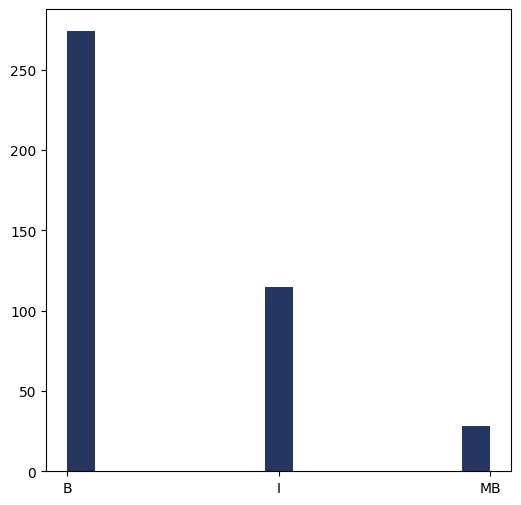

In [38]:
y1_train.hist(bins=15, figsize=(6, 6), grid=False, color="#253760")

É nítido que o conjunto não está balanceado, portanto, a acurácia por si só pode ser totalmente enganosa.

Sendo assim, podemos observar o F1-Score, já que esta métrica considera tanto a precisão quanto a sensibilidade, proporcionando uma medida equilibrada do desempenho do modelo.

Com base nos resultados obtidos, a inclusão de informações sobre o consumo de álcool por parte desses adolescentes não demonstrou uma melhora significativa para o desempenho deste modelo, conforme indicado pelas métricas de avaliação.

Isso não implica, de forma alguma, que o consumo de álcool seja apropriado ou liberado após uma prova de biologia; pelo contrário, é importante reiterar que o consumo de bebidas alcoólicas antes de uma determinada idade é ilegal em diversos países ao redor do mundo.

Adicionalmente, é interessante observar que, na árvore de decisão final em ambos modelos, a característica que se mostrou mais influente para determinar o desempenho acadêmico ao longo do ano foi a aspiração do indivíduo em cursar uma graduação. Este achado destaca a importância da motivação educacional como um fator significativo na avaliação do desempenho acadêmico, superando o impacto das informações sobre o consumo de álcool neste contexto específico.